In [1]:
import xgboost as xgb
#import lightgbm as lbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns', 500)

X_train = pd.read_csv("data/X_train.csv", index_col=0, error_bad_lines=False)
X_test = pd.read_csv("data/X_test.csv", index_col=0, error_bad_lines=False)
X_train.head(3)

b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,2552.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Superbe petit top bustier avec explosion de co...,44,100 % polyester,NaN,NaN,NaN,Multicolore,NaN,NaN,bon état,NaN,NaN,False,NaN,NaN,NaN,NaN,200.0,4.5,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,Top bustier multicolore,Emmaüs 88 Neufchateau
1,2,2486.0,2254.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Radio ITT Océnic Flirt, année 70\nPour déco",NaN,Plastique,NaN,NaN,NaN,Jaune,NaN,NaN,en l'état,NaN,NaN,True,ITT Océanic,NaN,NaN,NaN,1000.0,15.0,mobilier - deco,bibelots et objets déco,NaN,NaN,NaN,Radio ITT Océanic,Communauté Emmaüs Thouars (magasin Parthenay)
2,3,1536.0,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Veste boléro à manches courtes NÛMPH. Gris chi...,40,"Polyester, coton, laine",NaN,NaN,NaN,Gris,NaN,NaN,neuf,NaN,NaN,False,Nûmph,NaN,NaN,NaN,360.0,16.0,label selection,mode,mode femme,NaN,NaN,NaN,Label Emmaüs Chambéry


In [3]:
y_train = pd.read_csv("data/y_train.csv", index_col=0)


In [42]:
df = pd.concat([X_train,y_train], axis=1)
df.sample(10)

,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name,duration
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5147,4,600.0,800.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Classique et fonctionnel, ce bureau avec retou...",NaN,Mélaminé,NaN,NaN,NaN,NaN,80.0,NaN,en l'état,160.0,NaN,NaN,NaN,NaN,NaN,73.0,1000000.0,5.0,mobilier - deco,tables et bureaux,NaN,NaN,NaN,Bureau avec retour Pieds régla. de marque KINN...,Emmaüs Mobilier Pro,2
1984,4,1845.0,2471.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Jeu de société "" 1789 le jeu de la Révolution ...",NaN,NaN,NaN,NaN,NaN,Multicolore,NaN,NaN,bon état,NaN,NaN,NaN,Ferriot Productions,NaN,NaN,NaN,1360.0,8.0,enfance,"jeux de société, puzzles",NaN,NaN,NaN,"Jeu de société "" 1789 L jeu de la Révolution F...",Emmaüs 88 Neufchateau,2
388,5,3072.0,4608.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,œuf corozo sculpté + chapelet corozo \n6 cm x ...,NaN,NaN,NaN,NaN,NaN,Marron,NaN,NaN,bon état,NaN,NaN,True,NaN,NaN,NaN,NaN,40.0,10.0,loisirs,NaN,NaN,NaN,NaN,œuf corozo sculpté + chapelet corozo,Emmaus Chenôve,1
7696,2,2889.0,2062.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Sweat molletonné à manches longues.\nInscripti...,XL,coton/polyester,NaN,NaN,NaN,Gris,NaN,NaN,neuf,NaN,NaN,False,Kiabi,NaN,NaN,NaN,400.0,5.0,label selection,mode,mode femme,"gilets, pulls femme",NaN,"Sweat ""Frenchie"" kiabi",Le Léopard,1
4572,3,800.0,800.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Lot de 8 serviettes brodées à la main avec les...,NaN,Lin,NaN,NaN,NaN,Blanc,NaN,NaN,bon état,NaN,NaN,True,NaN,NaN,NaN,NaN,1130.0,16.0,mobilier - deco,NaN,NaN,NaN,NaN,"Lot de serviettes brodées main ""FB"" en lin",Label Emmaüs Chambéry,2
1580,1,2304.0,3072.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,1955. \nEditions G. P. \nAdaptation de Jean Sa...,NaN,NaN,NaN,NaN,1955.0,NaN,NaN,NaN,en l'état,NaN,NaN,NaN,NaN,Jean Sabran,g;p,NaN,150.0,6.0,librairie,NaN,NaN,NaN,NaN,Les aventures du Baron de Crac - Jean Sabran,Label Emmaus Angers,2
4941,7,2048.0,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Une sculpture de hibou en bois massif.\n\nDime...,NaN,Bois,NaN,NaN,NaN,Marron,NaN,NaN,bon état,NaN,NaN,False,NaN,NaN,NaN,NaN,1405.0,39.0,mobilier - deco,"objets d'art, antiquités",bibelots et objets déco,NaN,NaN,Hibou en bois sculpté,Emmaüs Alternatives Sélection,2
1104,2,3619.0,1622.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Robe courte à bretelles.\nCoupe ample.\nDécoll...,M,polyester/élasthanne,NaN,NaN,NaN,Rose,NaN,NaN,reconditionné,NaN,NaN,False,Mango,NaN,NaN,NaN,120.0,7.0,label selection,mode,mode femme,NaN,NaN,Robe vieux rose Mango,Le Léopard,2
7628,1,616.0,616.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,<p><strong>Livre d'occasion écrit par Arnaud C...,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,bon état,NaN,NaN,NaN,NaN,Arnaud Corbic,Editions Franciscaines,NaN,155.0,5.6,librairie,NaN,NaN,NaN,NaN,"Dietrich Bonhoeffer, Le Seigneur Des Non-Relig...",ADBook - la Librairie Solidaire des Ateliers d...,2


In [5]:
#list(df.select_dtypes(include=[np.number]).columns.values)

### Feature Engineering

##### text > numeric

In [6]:
df['desc_wc'] = df['product_description'].apply(lambda text: len(text.split()))
df['desc_len'] = df['product_description'].apply(len)

##### boolean > numeric

In [7]:
df['wifi'] = pd.to_numeric(df['wifi'])
df['vintage'] = pd.to_numeric(df['vintage'])

##### boolean feats

In [27]:
df['has_desc']= df['product_description'].isnull().astype('int64')
df['has_author'] = df['author'].isnull().astype('int64')
df['has_editor'] = df['editor'].isnull().astype('int64')
df['has_brand'] = df['brand'].isnull().astype('int64')
#test = test.applymap(lambda x: 1 if x == True else x)
#test = test.applymap(lambda x: 0 if x == False else x)


##### categorical > ordinal

In [9]:
from sklearn import preprocessing
conditions = ['vide','autre','reconditionné','comme neuf','neuf','en l\'état','bon état']
le = preprocessing.LabelEncoder()
le.fit(conditions)

LabelEncoder()

In [10]:
def fix_condition(df):
    df['condition'].fillna('vide',inplace=True)    
    df['condition'].apply(lambda x : x if x in conditions else 'autre')
    df['condition'] = le.transform(df['condition'])

In [11]:
fix_condition(df)

##### keep only numeric features

In [12]:
df_num = df.select_dtypes(include=[np.number])
## df._get_numeric_data()

print(df_num.shape)
df_num.head()

(8880, 20)


,images_count,image_width,image_height,year,product_width,wifi,condition,product_length,shoe_size,vintage,product_height,weight,price,duration,desc_wc,desc_len,has_desc,has_author,has_editor,has_brand
id,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,2552.0,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,200.0,4.5,2,36,191,0,1,1,1
1,2,2486.0,2254.0,NaN,NaN,NaN,3,NaN,NaN,1.0,NaN,1000.0,15.0,1,8,42,0,1,1,0
2,3,1536.0,1536.0,NaN,NaN,NaN,4,NaN,NaN,0.0,NaN,360.0,16.0,1,29,182,0,1,1,0
3,2,1100.0,1100.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,520.0,24.0,1,38,228,0,1,1,1
4,2,450.0,450.0,NaN,NaN,1.0,5,NaN,NaN,NaN,NaN,300.0,139.0,0,103,592,0,1,1,1


### Modelisation

In [13]:
feats_to_remove = [ 'product_width','product_length','product_height','shoe_size']

In [14]:
y_train_num = df_num['duration']
feats_to_drop = ['duration']+feats_to_remove
X_train_num = df_num.drop(feats_to_drop, axis=1)
X_train_num.shape, y_train_num.shape

((8880, 15), (8880,))

In [15]:
list(X_train_num)

['images_count',
 'image_width',
 'image_height',
 'year',
 'wifi',
 'condition',
 'vintage',
 'weight',
 'price',
 'desc_wc',
 'desc_len',
 'has_desc',
 'has_author',
 'has_editor',
 'has_brand']

In [16]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators = 10, 
                       learning_rate = 0.05,
                       max_depth=6,
                       n_jobs=1,
                       alpha = 0.1)

clf.fit(X_train_num, y_train_num, 
        verbose=False,
        early_stopping_rounds=10, 
        eval_metric="mlogloss",
        eval_set=[(X_train_num, y_train_num)]
        )

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_num.fillna(0), y_train_num) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Evaluation

In [17]:
print(clf.best_score)
clf.evals_result_


1.03424


{'validation_0': {'mlogloss': [1.089988,
   1.081954,
   1.074461,
   1.067426,
   1.060724,
   1.054763,
   1.049255,
   1.044067,
   1.039067,
   1.03424]}}

|eval|local|submission|
|---|---|---|
|xgb + num only + fe|1.034578|1.05311|
|xgb + num only + fe|1.03424|1.05282|
|knn|0.57070|8.96872|

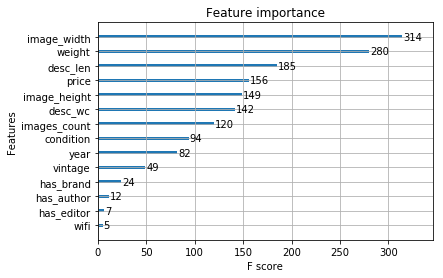

In [18]:
xgb.plot_importance(clf)
# xgb.plot_tree(bst, num_trees=2)
# xgb.to_graphviz(bst, num_trees=2)

from sklearn.metrics import log_loss 
pred_train = neigh.predict_proba(X_train_num.fillna(0))
print("LogLoss on train sample:",log_loss(y_pred=pred_train, y_true=y_train))
#print("LogLoss on train sample (CV):",log_loss(y_pred=pred_cv, y_true=y_train))


### submission 

In [19]:
X_test['desc_wc'] = X_test['product_description'].apply(lambda text: len(text.split()))
X_test['desc_len'] = X_test['product_description'].apply(len)
X_test['wifi'] = pd.to_numeric(X_test['wifi'])
X_test['vintage'] = pd.to_numeric(X_test['vintage'])
X_test['has_desc']= X_test['product_description'].isnull().astype('int64')
X_test['has_author'] = X_test['author'].isnull().astype('int64')
X_test['has_editor'] = X_test['editor'].isnull().astype('int64')
X_test['has_brand'] = X_test['brand'].isnull().astype('int64')
fix_condition(X_test)


In [20]:
X_test_ready = X_test[X_train_num.columns] # no shoes column
X_test.head()

,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name,desc_wc,desc_len,has_desc,has_author,has_editor,has_brand
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,616.0,616.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,<p><strong>Livre d'occasion écrit par Stephen ...,NaN,NaN,NaN,NaN,1999.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Stephen King,J'Ai Lu,NaN,149.0,1.8,librairie,NaN,NaN,NaN,NaN,Peur bleue - Stephen King,Booki - la Librairie Solidaire de Retrilog,102,726,0,0,0,1
1,2,3000.0,4000.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Eléguant haut transparent pour femme imprimé ...,XXL,polyester,NaN,NaN,NaN,Multicolore,NaN,NaN,1,NaN,NaN,0.0,Woman,NaN,NaN,NaN,100.0,3.0,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,vêtement femme Woman,Emmaüs 88 Neufchateau,15,102,0,1,1,0
2,3,2448.0,2448.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Collants bleu motifs en losange discret femme ...,NaN,"85 % polyamide, 15% élasthanne.",NaN,NaN,NaN,Bleu,NaN,NaN,4,NaN,NaN,0.0,KUNERT,NaN,NaN,NaN,200.0,3.0,mode,accessoires femme,label selection,NaN,NaN,Collants bleu motifs en losange discret femme ...,Emmaüs Sacré Dressing !,39,224,0,1,1,0
3,10,2448.0,2448.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Un beau vase à couvercle en porcelaine\nde la ...,NaN,Porcelaine,NaN,NaN,NaN,Multicolore,NaN,NaN,1,NaN,NaN,NaN,Kaiser Porcelaine,NaN,NaN,NaN,2130.0,20.0,mobilier - deco,Vases et Pots,NaN,NaN,NaN,Vase à Couvercle,Emmaüs Vannes - la Boutique en ligne,20,120,0,1,1,0
4,3,2753.0,2974.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Ancien Boulier d'écolier en bois . Les enfants...,NaN,NaN,NaN,NaN,NaN,Multicolore,NaN,NaN,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,340.0,7.5,enfance,"jouets anciens, jouets en bois",NaN,NaN,NaN,Ancien Boulier d'écolier en bois,Emmaüs 88 Neufchateau,39,206,0,1,1,1


In [21]:
df_test_num = X_test_ready.select_dtypes(include=[np.number])

predicted_test_tr = clf.predict_proba(df_test_num)
predicted_test_tr

array([[0.3259364 , 0.32016426, 0.35389936],
       [0.33342296, 0.3109339 , 0.35564312],
       [0.32842875, 0.44092894, 0.23064235],
       ...,
       [0.3841175 , 0.3173273 , 0.29855517],
       [0.37550807, 0.35134366, 0.27314824],
       [0.28420877, 0.32222176, 0.3935695 ]], dtype=float32)

predicted_test_tr = neigh.predict_proba(df_test_num.fillna(0))
predicted_test_tr

In [37]:
pred_test = predicted_test_tr
df_submission = pd.DataFrame(pred_test, index=X_test.index)

In [38]:
df_submission.head()

,0,1,2
id,,,
0,0.000000,0.333333,0.666667
1,0.666667,0.000000,0.333333
2,0.000000,1.000000,0.000000
3,0.333333,0.666667,0.000000
4,0.000000,0.666667,0.333333


In [39]:
import io, math, requests

# Only works in Python3, see comment below for Python2
def submit_prediction(df, sep=',', **kwargs):
    # TOKEN to recover on the platform: "Submissions"> "Submit from your Python Notebook"
    TOKEN=''  
    URL='https://qscore.datascience-olympics.com/api/submissions'
    #buffer = io.BytesIO() # Python 2
    buffer = io.StringIO() # Python 3
    df.to_csv(buffer, sep=sep, **kwargs)
    buffer.seek(0)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': buffer})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)



In [40]:
#submit_prediction(df_submission, sep=',', index=True)